In [6]:
import matplotlib.pyplot as plt

In [14]:
# define line clipping window boundaries
xmin, xmax = 50, 80
ymin, ymax = 10, 40
INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8

In [15]:
def compute_outcode(x, y):
    code = INSIDE

    if x < xmin:
        code |= LEFT
    elif x > xmax:
        code |= RIGHT
    if y < ymin:
        code |= BOTTOM
    elif y > ymax:
        code |= TOP

    return code

In [16]:
def cohen_sutherland_line_clip(x0, y0, x1, y1):
    outcode0 = compute_outcode(x0, y0)
    outcode1 = compute_outcode(x1, y1)
    accept = False

    while True:
        if not (outcode0 | outcode1):
            accept = True
            break
        elif outcode0 & outcode1:
            break
        else:
            outcode_out = outcode1 if outcode1 > outcode0 else outcode0

            if outcode_out & TOP:
                x = x0 + (x1 - x0) * (ymax - y0) / (y1 - y0)
                y = ymax
            elif outcode_out & BOTTOM:
                x = x0 + (x1 - x0) * (ymin - y0) / (y1 - y0)
                y = ymin
            elif outcode_out & RIGHT:
                y = y0 + (y1 - y0) * (xmax - x0) / (x1 - x0)
                x = xmax
            elif outcode_out & LEFT:
                y = y0 + (y1 - y0) * (xmin - x0) / (x1 - x0)
                x = xmin

            if outcode_out == outcode0:
                x0, y0 = x, y
                outcode0 = compute_outcode(x0, y0)
            else:
                x1, y1 = x, y
                outcode1 = compute_outcode(x1, y1)

    return accept, x0, y0, x1, y1

In [17]:
x0, y0 = 70, 20
x1, y1 = 100, 10

accept, x0_clip, y0_clip, x1_clip, y1_clip = cohen_sutherland_line_clip(x0, y0, x1, y1)

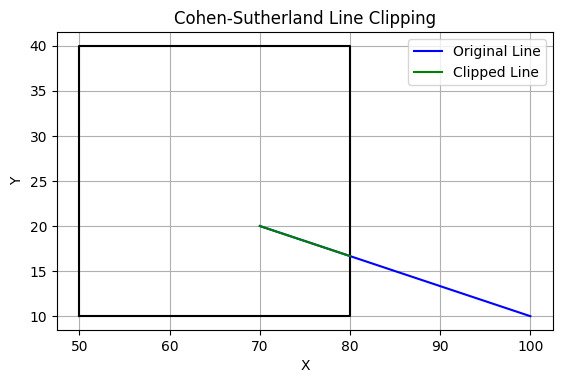

In [18]:
plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], color='black')

# Plot the original line segment
plt.plot([x0, x1], [y0, y1], color='blue', label='Original Line')

# Plot the clipped line segment
if accept:
    plt.plot([x0_clip, x1_clip], [y0_clip, y1_clip], color='green', label='Clipped Line')
else:
    plt.text((x0 + x1) / 2, (y0 + y1) / 2, 'Line Rejected', color='red', fontsize=12)

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Cohen-Sutherland Line Clipping')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()